# Hackathon - Building a Movie Recommendation System     
Assume that you started working with Netfiz as a Junior Data Scientist. For your company, providing better movie recommendations is at its core and, helps improve better user experience and generate more revenue. 

Understand that      

Recommender systems make movie-watching a personalized adventure, delighting users with tailored suggestions based on their tastes.
By predicting user preferences, these systems keep users engaged, driving increased interaction with your platform.
A robust movie recommender system translates to business success. Satisfied users are loyal users, contributing to increased user retention and revenue.
Imagine the excitement of helping users discover their next favorite movie! Later during the internship program, we will ask you to create a cutting-edge movie recommendation system based on a treasure trove of user ratings.     

For now, your first task at Netfiz is to crunch the data given and answer all the questions asked below.    



About Dataset: Dive into a dataset brimming with 100,836 ratings across 9,742 movies, generated by 610 users over the years. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. Each user is represented by an id, and no other information is provided about the user. The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv`and `tags.csv`.      

Click here to download the dataset      
Following is a series of MCQ and subjective questions that you have to answer.   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

## 1. Download the data from the above link. How many ".csv" files are available in the dataset?

In [2]:
# 4

## 2. What is the shape of "movies.csv"?

(3683, 4)     
(9742, 3)    
(100836, 4)     
None of the above   

In [3]:
movies = pd.read_csv('data/movie_data/movies.csv')

In [4]:
movies.shape

(9742, 3)

## 3. What is the shape of "ratings.csv"?

(3683, 4)    
(9742, 3)     
(100836, 4)    
None of the above

In [5]:
ratings = pd.read_csv('data/movie_data/ratings.csv')

In [6]:
ratings.shape

(100836, 4)

## 4. How many unique "userId" are available in "ratings.csv"?

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratings['userId'].nunique()

610

## 5. Which movie has recieved maximum number of user ratings?

Matrix        
Pulp Fiction      
Forrest Gump     
Shawshank Redemption

In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
rating_counts = ratings['movieId'].value_counts()
rating_counts

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

In [11]:
movie_counts = rating_counts.reset_index()

In [12]:
movie_counts.columns = ['movieId', 'ratingCount']
movie_counts

,movieId,ratingCount
0,356,329
1,318,317
2,296,307
3,593,279
4,2571,278
...,...,...
9719,86279,1
9720,86922,1
9721,5962,1
9722,87660,1


In [13]:
movie_with_counts = movie_counts.merge(movies, on='movieId')

In [14]:
movie_with_counts

,movieId,ratingCount,title,genres
0,356,329,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,317,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller
...,...,...,...,...
9719,86279,1,Into Eternity (2010),Documentary
9720,86922,1,Nothing to Declare (Rien à déclarer) (2010),Comedy
9721,5962,1,Body of Evidence (1993),Drama|Thriller
9722,87660,1,Too Big to Fail (2011),Drama


In [15]:
most_rated_movie = movie_with_counts.loc[movie_with_counts['ratingCount'].idxmax()]
most_rated_movie

movieId                             356
ratingCount                         329
title               Forrest Gump (1994)
genres         Comedy|Drama|Romance|War
Name: 0, dtype: object

## 6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
a) alternate universe     
b) karate      
c) philosophy    
d) post apocalyptic

In [16]:
tags = pd.read_csv('data/movie_data/tags.csv')

In [17]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [18]:
movies[movies['title'] == "Matrix, The (1999)"]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [19]:
movies[movies['title'] == "Matrix, The (1999)"]['movieId']

1939    2571
Name: movieId, dtype: int64

In [20]:
movies[movies['title'] == "Matrix, The (1999)"]['movieId'].values[0]

2571

In [21]:
matrix_movie_id = movies[movies['title'] == "Matrix, The (1999)"]['movieId'].values[0]

In [22]:
tags.loc[tags['movieId']==matrix_movie_id]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [23]:
tags.loc[tags['movieId']==matrix_movie_id]['tag'].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

## 7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [24]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
movies[movies['title']=="Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [26]:
movies[movies['title']=="Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

589

In [27]:
teriminator_movieID = movies[movies['title']=="Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

In [28]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [29]:
ratings[ratings['movieId']==teriminator_movieID]

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012
...,...,...,...,...
97461,606,589,3.5,1171325855
98514,607,589,4.0,963078960
98786,608,589,3.0,1117415154
99519,609,589,3.0,847220990


In [30]:
ratings[ratings['movieId']==teriminator_movieID]['rating'].mean()

3.970982142857143

In [31]:
round(ratings[ratings['movieId']==teriminator_movieID]['rating'].mean(), 2)

3.97

## 8. How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

Normal Distribution        
Left Skewed Distribution       
Right Skewed Distribution      
Uniform Distribution


In [32]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
movies[movies['title']=="Fight Club (1999)"]

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [34]:
movies[movies['title']=="Fight Club (1999)"]

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [35]:
fight_club_movieID = movies[movies['title']=="Fight Club (1999)"]['movieId'].values[0]

In [36]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [37]:
ratings[ratings['movieId']==fight_club_movieID]

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


In [38]:
fight_club = ratings[ratings['movieId']==fight_club_movieID]
fight_club

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


In [39]:
fight_club_ratings = fight_club['rating']

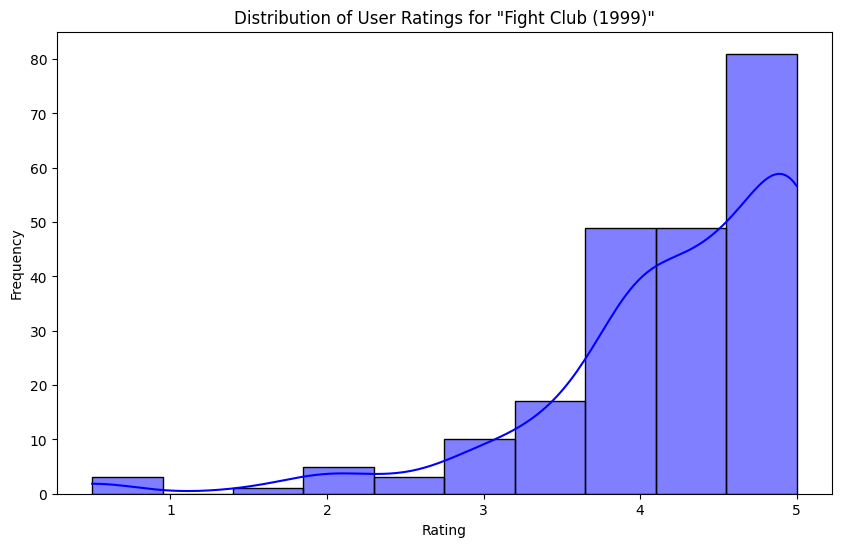

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings, kde=True, bins=10, color='blue')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## 🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

## 9. Which movie is the most popular based on  average user ratings?
Answer this question only after applying the above mentioned "Mandatory Operration".

In [41]:
grouped_ratings = ratings.groupby('movieId').agg(rating_count=('rating', 'count'), average_rating=('rating', 'mean')).reset_index()

In [42]:
grouped_ratings

,movieId,rating_count,average_rating
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [43]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
merged_df = pd.merge(movies, grouped_ratings, on='movieId')

In [45]:
merged_df

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [46]:
popular_movies = merged_df[merged_df['rating_count'] > 50]
popular_movies

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [47]:
most_popular_movie = popular_movies.loc[popular_movies['average_rating'].idxmax()]
most_popular_movie

movieId                                        318
title             Shawshank Redemption, The (1994)
genres                                 Crime|Drama
rating_count                                   317
average_rating                            4.429022
Name: 277, dtype: object

## 10. Select all the correct options which comes under top 5 popular movies based on number of user ratings.

Answer this question only after applying the above mentioned "Mandatory Operration".       

Pulp Fiction (1994)     
Bad Boys (1995)                             
Silence of the Lambs, The (1991)     
Matrix, The (1999)

In [48]:
top_5_popular_movies = popular_movies.sort_values(by='rating_count', ascending=False).head(5)

In [49]:
print(top_5_popular_movies[['title', 'rating_count']])

                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


## 11. Which Sci-Fi movie is "third most popular" based on the number of user ratings?
Answer this question only after applying the above mentioned "Mandatory Operration".

a) Deadpool (2016)                     
b) Terminator 2: Judgment Day (1991)     
c) X-Men: The Last Stand (2006)     
d) Jurassic Park (1993)

In [50]:
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]

In [51]:
sci_fi_movies.sort_values(by='rating_count', ascending=False)

,movieId,title,genres,rating_count,average_rating
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [52]:
sci_fi_movies.sort_values(by='rating_count', ascending=False).iloc[2]

movieId                                        480
title                         Jurassic Park (1993)
genres            Action|Adventure|Sci-Fi|Thriller
rating_count                                   238
average_rating                                3.75
Name: 418, dtype: object

## 12. Mention the movieId of the movie which has the highest IMDB rating.

In [53]:
links = pd.read_csv('data/movie_data/links.csv')

In [54]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [55]:
grouped_ratings = ratings.groupby('movieId').agg(rating_count=('rating', 'count'),
                                                 average_rating=('rating', 'mean')).reset_index()

In [56]:
grouped_ratings

,movieId,rating_count,average_rating
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [57]:
merged_df = pd.merge(movies, grouped_ratings, on='movieId')
merged_df.head()

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


In [58]:
popular_movies = merged_df[merged_df['rating_count'] > 50]
popular_movies.head()

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [59]:
movies_with_links = pd.merge(popular_movies, links, on='movieId')
movies_with_links.head()

,movieId,title,genres,rating_count,average_rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [60]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'}
    
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
    return imdb_rating.text if imdb_rating else np.nan

In [61]:
movies_with_links['imdb_rating'] = movies_with_links['imdbId'].apply(lambda x: scrapper(x))
movies_with_links.head()

,movieId,title,genres,rating_count,average_rating,imdbId,tmdbId,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.7
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3


In [63]:
highest_rated_movie = movies_with_links.loc[movies_with_links['imdb_rating'].astype(float).idxmax()]
highest_rated_movie

movieId                                        318
title             Shawshank Redemption, The (1994)
genres                                 Crime|Drama
rating_count                                   317
average_rating                            4.429022
imdbId                                      111161
tmdbId                                       278.0
imdb_rating                                    9.3
Name: 53, dtype: object

In [64]:
print(f"The movie with the highest IMDb rating is: '{highest_rated_movie['title']}' with movieId: {highest_rated_movie['movieId']} 
        and an IMDb rating of {highest_rated_movie['imdb_rating']}")

The movie with the highest IMDb rating is: 'Shawshank Redemption, The (1994)' with movieId: 318 and an IMDb rating of 9.3


## 13. Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [67]:
movies_with_links[movies_with_links['genres'].str.contains('Sci-Fi')]

,movieId,title,genres,rating_count,average_rating,imdbId,tmdbId,imdb_rating
12,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051,114746,63.0,8.0
30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0,5.3
35,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0,5.6
36,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0,5.6
38,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043,114898,9804.0,6.3
...,...,...,...,...,...,...,...,...
427,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565,848228,24428.0,8.0
428,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185,1392170,70160.0,7.2
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


In [70]:
sci_fi_movies = movies_with_links[movies_with_links['genres'].str.contains('Sci-Fi')]
sci_fi_movies.head()

,movieId,title,genres,rating_count,average_rating,imdbId,tmdbId,imdb_rating
12,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051,114746,63.0,8.0
30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0,5.3
35,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0,5.6
36,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0,5.6
38,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043,114898,9804.0,6.3


In [71]:
sci_fi_movies.loc[sci_fi_movies['imdb_rating'].astype(float).idxmax()]

movieId                                                     79132
title                                            Inception (2010)
genres            Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
rating_count                                                  143
average_rating                                           4.066434
imdbId                                                    1375666
tmdbId                                                    27205.0
imdb_rating                                                   8.8
Name: 424, dtype: object

In [72]:
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].astype(float).idxmax()]
highest_rated_sci_fi_movie

movieId                                                     79132
title                                            Inception (2010)
genres            Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
rating_count                                                  143
average_rating                                           4.066434
imdbId                                                    1375666
tmdbId                                                    27205.0
imdb_rating                                                   8.8
Name: 424, dtype: object

In [74]:
print(f"The Sci-Fi movie with the highest IMDb rating is: '{highest_rated_sci_fi_movie['title']}' with movieId: {highest_rated_sci_fi_movie['movieId']} and an IMDb rating of {highest_rated_sci_fi_movie['imdb_rating']}")

The Sci-Fi movie with the highest IMDb rating is: 'Inception (2010)' with movieId: 79132 and an IMDb rating of 8.8
